In [ ]:
# Trend Analysis
# Average Rating tred over time 
# ratings_clean.csv has been used for this task.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



data = pd.read_csv("ratings_clean.csv")
data.drop(data[data['rating'] == -999].index, inplace=True) 
data['rating'].drop_duplicates().reset_index(drop=True)
data.head()


id     item  rating    datetime
0   0  title_0       4  2021-04-17
1   0  title_1       3  2021-01-09
2   0  title_2       5  2021-05-21
3   0  title_3       4  2021-05-29
4   0  title_4       2  2021-01-24

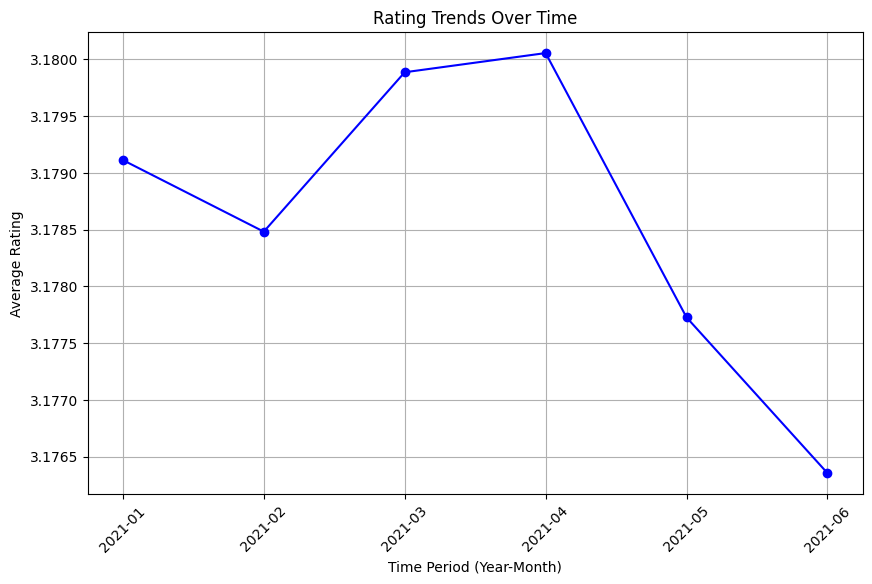

In [3]:
# Convert the 'datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Group the data by 'datetime' and calculate the average rating for each time period
rating_trends = data.groupby(data['datetime'].dt.to_period("M"))['rating'].mean()

# Reset the index to work with 'datetime' as a column
rating_trends = rating_trends.reset_index()

# Convert Period objects to strings for plotting
rating_trends['datetime'] = rating_trends['datetime'].dt.strftime('%Y-%m')

# Plot the rating trends over time
plt.figure(figsize=(10, 6))
plt.plot(rating_trends['datetime'], rating_trends['rating'], marker='o', linestyle='-', color='b')
plt.xlabel('Time Period (Year-Month)')
plt.ylabel('Average Rating')
plt.title('Rating Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()